### 1. Introdução
https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/notebook

### 2. Preparação dos Dados

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None


In [6]:
# Leitura dos dados em um Data frame
df = pd.read_csv('Churn_Modelling.csv', delimiter=',')
df.shape

(10000, 14)

In [7]:
# Vefifica a lista de colunas e valores
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Retirando colunas sem necessidade

In [8]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Análise dos dados:
Com base no exposto acima, algumas questões persistem:
- Os dados parecem ser um instantâneo em um determinado momento no tempo, por exemplo, o saldo é para uma determinada data, o que gera várias perguntas:
    - Qual é a data e qual é a relevância dessa data?
    - Seria possível obter saldos ao longo de um período de tempo em vez de uma única data?
- Existem clientes que saíram, mas ainda possuem saldo em suas contas! O que isso poderia significar? Eles poderiam ter saído de um produto, mas não do banco?
- O que significa ser um membro ativo e existem diferentes graus disso? Seria melhor fornecer a contagem de transações em termos de créditos e débitos na conta?
- Uma análise detalhada dos produtos adquiridos por um cliente poderia fornecer mais informações além da simples contagem de produtos.

In [10]:
# Checando os tipos das variáveis
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Análise Exploratória de Dados (Exploratory Data Analysis, EDA)
O principal interesse no problema é compreender como as variáveis condicionais fornecidas se relacionam com o status da variável categórica *'Exited'*, relativa a retenção de clientes de unidades bancárias.

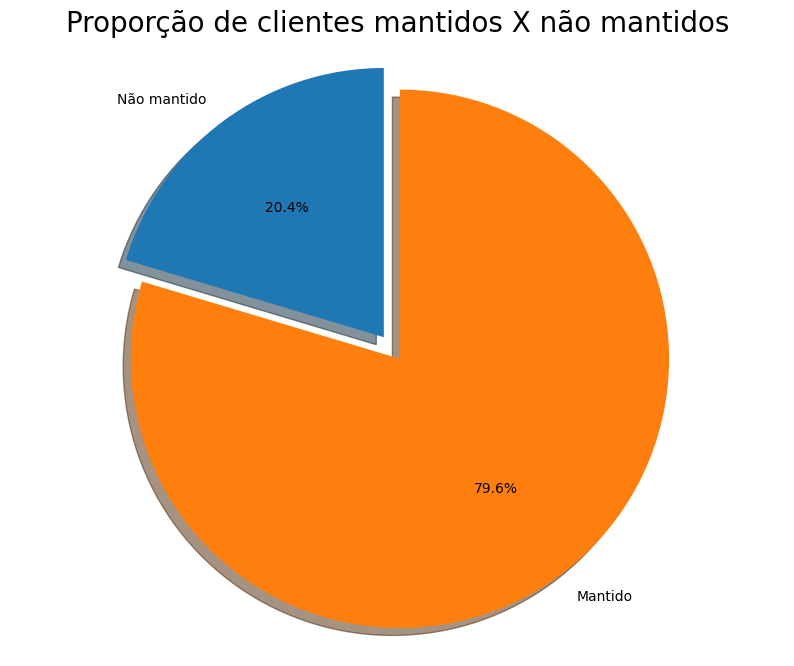

In [11]:
labels = 'Não mantido', 'Mantido'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporção de clientes mantidos X não mantidos", size = 20)
plt.show()

#### Análise da relação:
Cerca de 20% dos clientes saíram. Portanto, o modelo de referência deverá prever que 20% dos clientes irão sair. Como 20% é um número pequeno, é necessário garantir que o modelo escolhido preveja com grande precisão esses 20%, pois é do interesse do banco identificar e reter esse grupo, em vez de prever com precisão os clientes que são retidos.

<Axes: xlabel='IsActiveMember', ylabel='count'>

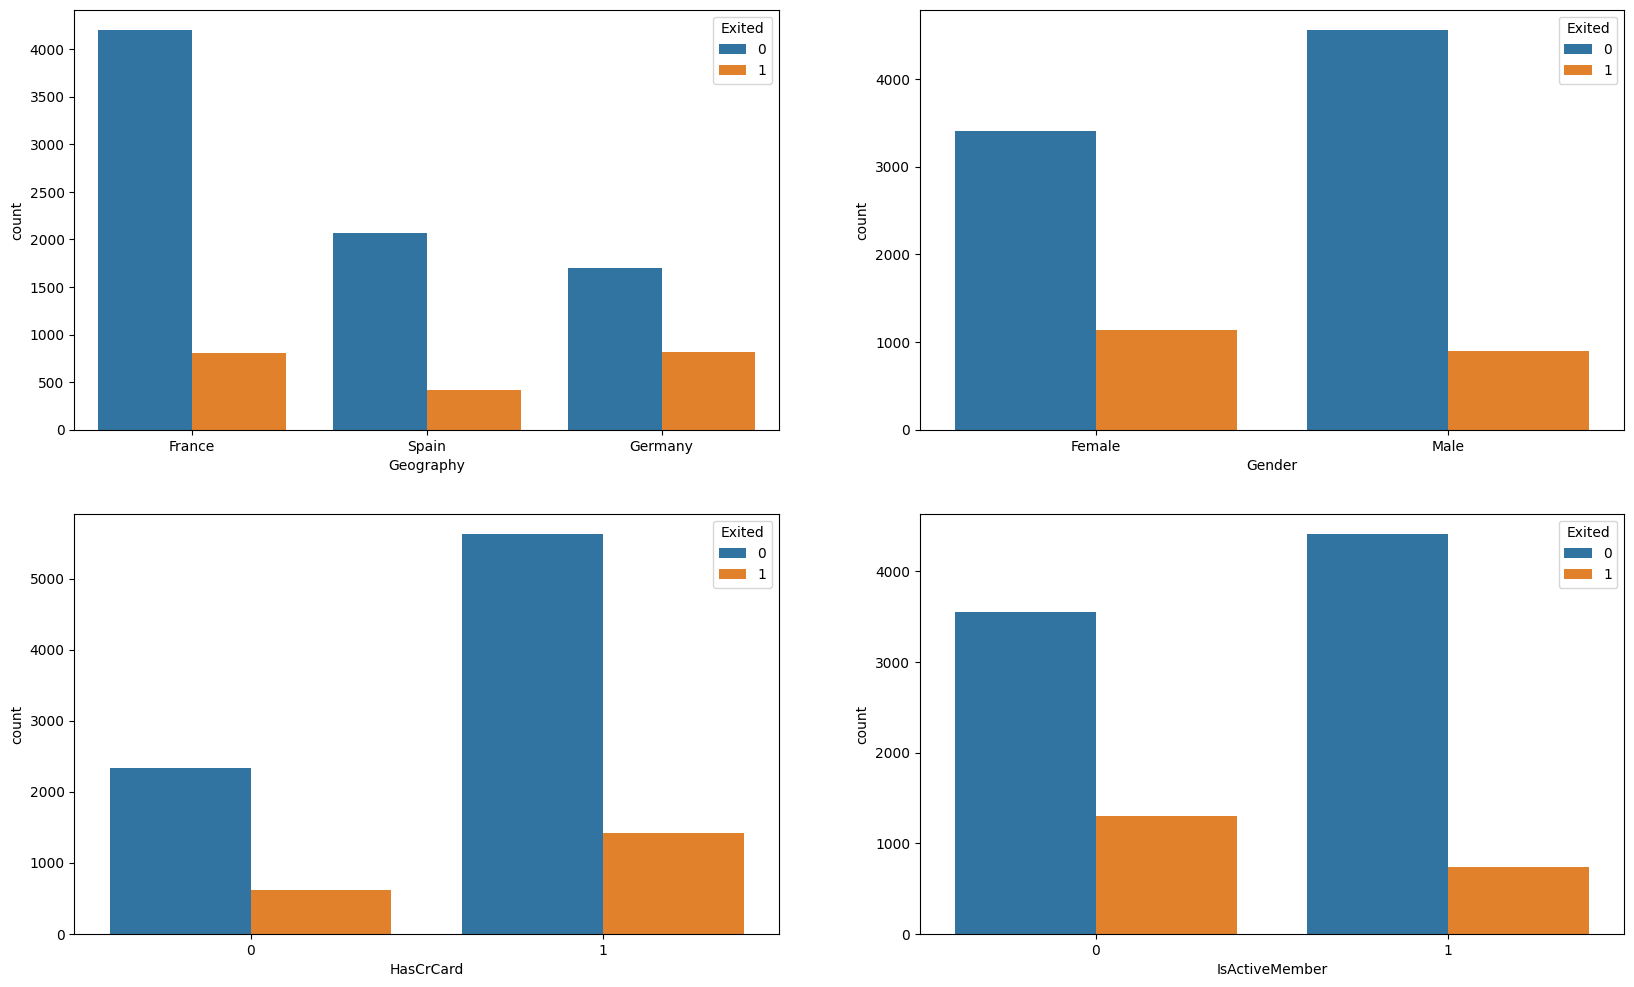

In [12]:
# Revisão da relação entre o atributo "Status" e as variáveis categóricas, que atribuiem categorias.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

#### Análise das relações entre 'status' e as variáveis categóricas:
- A maioria dos dados é de pessoas da França. No entanto, a proporção de clientes que saíram é inversamente relacionada à população de clientes, o que sugere que o banco possa ter um problema (possivelmente falta de recursos de atendimento ao cliente) nas áreas onde tem menos clientes.
- A proporção de clientes do sexo feminino que saíram também é maior do que a dos clientes do sexo masculino.
- A maioria dos clientes que saíram são aqueles com cartões de crédito. Dado que a maioria dos clientes possui cartões de crédito.
- Os membros inativos têm uma taxa de saída maior. Preocupante é que a proporção geral de membros inativos é bastante alta, o que sugere que o banco pode precisar implementar um programa para converter esse grupo em clientes ativos, pois isso certamente terá um impacto positivo na retenção de clientes.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

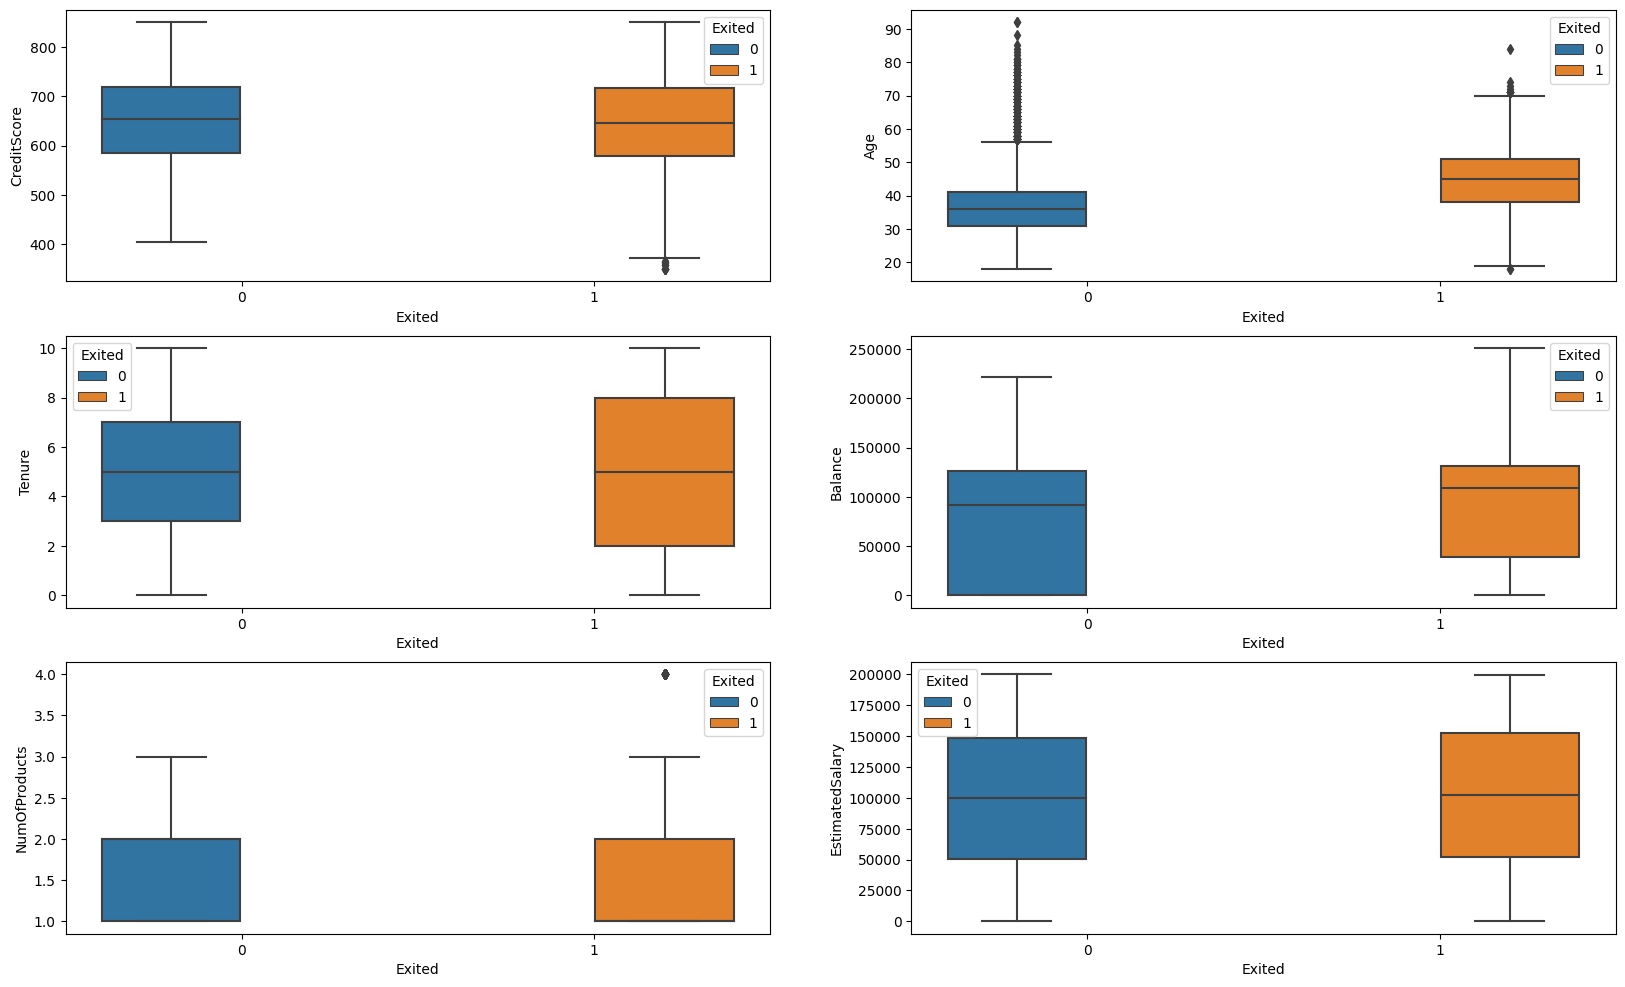

In [14]:
# Revisão da relação entre o atributo "Status" e as variáveis contínuas.
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

#### Análise das relações entre 'status' e as variáveis contínuas:
- Não há diferença significativa na distribuição do score de crédito entre os clientes mantidos e os que saíram.
- Os clientes mais velhos têm uma taxa de saída maior em comparação aos mais jovens, sugerindo uma diferença nas preferências de serviço nas diferentes faixas etárias. O banco pode precisar rever seu mercado-alvo ou sua estratégia de retenção entre os diferentes grupos etários.
- Em relação ao tempo de permanência (tenure), os clientes nos extremos (que passaram pouco tempo ou muito tempo com o banco) têm maior probabilidade de sair em comparação com aqueles que têm um tempo médio de permanência.
- O banco está perdendo clientes com saldos significativos, o que pode afetar seu capital disponível.
- Nem o produto nem o salário têm um efeito significativo na probabilidade de saída.

### 4. Feature engineering
Dividindo a base de treino e teste

In [15]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

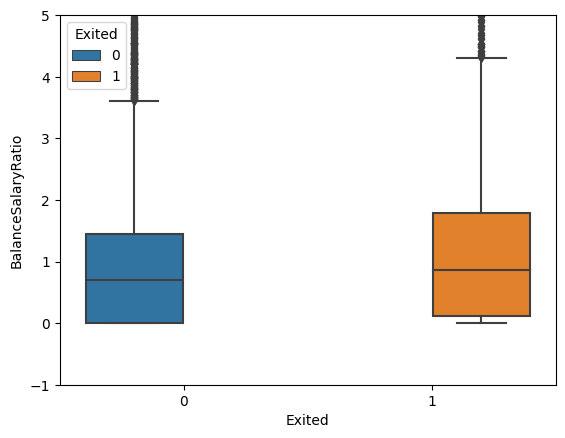

In [16]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

#### Análise da relação da taxa Saldo/Salário e 'Status':
Foi observado anteriormente que o salário tem pouco efeito na probabilidade de um cliente sair. No entanto, como acima, a proporção entre o saldo bancário e o salário estimado indica que os clientes com uma proporção mais alta têm maior probabilidade de sair, o que seria preocupante para o banco, pois isso afeta sua fonte de capital.

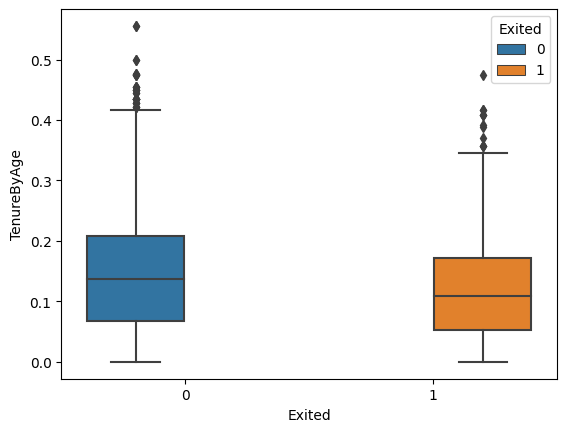

In [17]:
# Foi acrescida uma variável com o objetivo de padronizar o tempo de permanência em relação à idade:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
#plt.ylim(-1, 1)
plt.show()

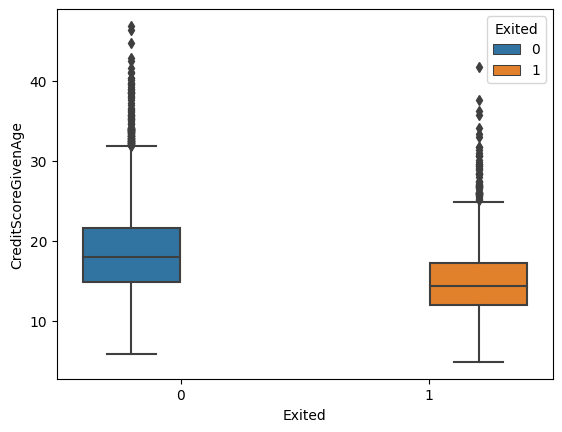

In [18]:
# A última variável inserida tem o objetivo de capturar o score de crédito em relação à idade, 
# a fim de levar em consideração o comportamento de crédito ao longo da vida adulta.
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df_train)
# plt.ylim(-1, 1)
plt.show()

In [19]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


### 5. Preparando o dado para o Treinamento do Modelo

In [21]:
# Rearranjando as colunas por tipo de dado
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [22]:
# Para as variáveis boolenadas, foi alterado o valor 0 para -1, usando o formato "one-hot"
# para que os modelos possam capturar uma relação negativa 
# quando o atributo for inaplicável, em vez de ser representado como 0.
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [23]:
# usando formato "one-hot" para as demais variáveis categóricas
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [24]:
# Normalizando as variáveis continuas usando a escala minMax
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [39]:
# Função para a preparação do dado de teste
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Novas variáveis
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reordemamento das colunas
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Muda de 0 in para -1 nas variáveis categóricas
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One-hot encode para as variáveis categóricas
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Garante que todas as variáveis one-hot que se encontram no vertor de 
    # treino estão no de teste 
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # Aplicando escala MinMax scaling para variáveis contínuas
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ordena as colunas na mesma ordem do dataframe de teste
    df_predict = df_predict[df_train_Cols]
    return df_predict